In [1]:
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
sns.set(rc={'figure.figsize':(6,8)}) 

import warnings
warnings.simplefilter("ignore")

%matplotlib inline

from sklearn.preprocessing import LabelEncoder 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn import metrics

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.metrics import SCORERS
import re

import nltk 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Functions

In [2]:
def cleanTxt(txt):
    txt = txt.lower()
    txt = re.sub(r'RT[\s]+', '', txt) #removing RT
    txt = re.sub(r'[^\w\s]','', txt) #remove everything except words and space
    txt = re.sub(r'_','', txt) #how to remove underscore as well
    txt = re.sub('\r\n', '', txt)
    txt = re.sub('amp', '', txt) # removing ampersand
    if 'https' in txt: # removing hyperlinks 
        pos = txt.find('https')
        txt = txt[:pos]
    return txt

In [3]:
def stopWords(txt): 
    txt_lst = txt.split(" ")
    txt_lst = [word for word in txt_lst if word not in stopwords.words('english')]
    txt_lst = [wnet.lemmatize(word) for word in txt_lst]
    txt_lst = [word for word in txt_lst if word != '']
    txt_lst = [word for word in txt_lst if word != 'u0001f449'] # indicates back hand emoji pointing right
    txt_lst = [word for word in txt_lst if word != 'data']
    txt_lst = [word for word in txt_lst if word != 'ethics']
    txt_lst = [word for word in txt_lst if word != 'ethic']  
    txt_lst = [word for word in txt_lst if word != 'ethical']
    txt_lst = [word for word in txt_lst if word != 'dataethics']
    txt_lst = [word for word in txt_lst if word != 'techethics']
    txt_lst = [word for word in txt_lst if word != '\r\n']
    txt_lst = [word for word in txt_lst if word != 'digitalethics']
    txt_lst = [word for word in txt_lst if word != 'u']
    return " ".join(txt_lst)

In [4]:
def evaluate_k_kmeans_inertia(k):
    print(f"running Kmeans with k={k}")
    estimator_kmeans = KMeans(random_state=42, n_clusters=k)
    estimator_kmeans.fit(desc_vec)
    return estimator_kmeans.inertia_

In [5]:
!pip install pycountry

  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746863 sha256=e30e09dd51387c199a2607624dde8b37d83210222019a86c0cb06ad870031b26
  Stored in directory: c:\users\pc\appdata\local\pip\cache\wheels\09\eb\0d\4ee773c6a4aadc2a43cb5c1d07f268f13c4cdc0eec88e7c1ef
Successfully built pycountry


In [6]:
!pip install pycountry
def findCountry(txt):
    loc = []
    for c in pycountry.countries:
        if c.name in txt:
            return c.name
        elif txt != 'global':
            return 'Unknown'

In [7]:
def cluster_summary(ci, df):
    cluster = df[df.cluster_id==ci]
    cluster_summary = cluster[categorical_data.columns].mode().to_dict(orient="records")[0]
    cluster_summary.update(cluster.mean().to_dict())
    return cluster_summary

In [8]:
def cluster_comparison(*cluster_ids):
    summaries = []
    for cluster_id in cluster_ids:
        summaries.append(cluster_summary(cluster_id, df2))
    return pd.DataFrame(summaries).set_index("cluster_id").T

In [9]:
def kmeans_cluster(df, n_clusters=2):
    model = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = model.fit_predict(df)
    cluster_results = df.copy()
    cluster_results['Cluster'] = clusters
    return cluster_results

In [10]:
def graph_summary_clustering(results):
    cluster_size = results.groupby(['Cluster']).size().reset_index()
    cluster_size.columns = ['Cluster', 'Count']
    cluster_means = results.groupby(['Cluster'], as_index=False).mean()
    cluster_summary = pd.merge(cluster_size, cluster_means, on='Cluster')
    cluster_summary = cluster_summary.drop(["Count"], axis=1).set_index("Cluster")
    return cluster_summary[sorted(cluster_summary.columns)]

# Data Ethics Tweets

In [11]:
data = pd.read_csv('data_ethics.csv')

In [12]:
data = data.drop_duplicates('text')
data.head()

,user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,...,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url
0,x1065190678819426304,x1405214055690817536,2021-06-16 17:21:53,Bioinfo4women,Catherine d'Ignazio @kanarinka ass. prof. of @...,Twitter Web App,278,x1405211725343899649,x1065190678819426304,Bioinfo4women,...,1698,2306,2018-11-21 10:30:22,False,https://t.co/bPKhKjysVJ,http://bioinfo4women.bsc.es,NaN,https://pbs.twimg.com/profile_banners/10651906...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1065191023...
1,x20247396,x1405213743189938178,2021-06-16 17:20:38,randomvichar,First that Timnit gebru and now this @ruchowdh...,Twitter Web App,259,NaN,NaN,NaN,...,14659,11791,2009-02-06 16:07:05,False,NaN,NaN,NaN,https://pbs.twimg.com/profile_banners/20247396...,http://abs.twimg.com/images/themes/theme18/bg.gif,http://pbs.twimg.com/profile_images/1298349313...
2,x829405647124852736,x1405212949535285255,2021-06-16 17:17:29,EnricoManlapig,Attending a panel on human contexts and ethics...,Twitter Web App,175,NaN,NaN,NaN,...,135,207,2017-02-08 19:04:50,False,https://t.co/cEaS0tEci4,http://emanlapig.net,NaN,https://pbs.twimg.com/profile_banners/82940564...,NaN,http://pbs.twimg.com/profile_images/1395601651...
3,x42950393,x1405198601224077314,2021-06-16 16:20:28,Matrix_MSU,"""Framing the ethics of our project around incl...",Twitter Web App,265,NaN,NaN,NaN,...,1857,1047,2009-05-27 19:16:36,False,http://t.co/6I5L5wDBSQ,http://matrix.msu.edu,NaN,https://pbs.twimg.com/profile_banners/42950393...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1124338969...
4,x866729142,x1405197501750206464,2021-06-16 16:16:06,JenniferCregar,"Learn how to get unbiased, ethical insights fr...",EveryoneSocial,248,NaN,NaN,NaN,...,3662,2213,2012-10-07 18:20:01,False,https://t.co/95v7g3MojM,http://www.adp.com/solutions/midsized-business...,NaN,https://pbs.twimg.com/profile_banners/86672914...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1058204540...


In [13]:
data.user_id.nunique()

626

In [14]:
data.shape

(818, 90)

# Identifying Columns
## Cleaning Data

In [17]:
ident = data[["verified", "lang", "location", "followers_count", "description", "user_id"]] 
ident = ident.drop_duplicates()

In [18]:
ident = ident.dropna()
ident.head()

,verified,lang,location,followers_count,description,user_id
1,False,en,Bharatvarsh,348,Preferred Pronoun: His Majesty,x20247396
2,False,en,"Santa Barbara, CA",15,Economics & Business professor at Westmont Col...,x829405647124852736
3,False,en,Michigan State University,2052,Matrix: Center for Digital Humanities & Social...,x42950393
4,False,en,"Sarasota, FL",137,"District Sales Manager @ADP Expertise in #HCM,...",x866729142
6,False,en,Faversham<U+21C6>Falmer<U+21C6>London<U+21C6>EU,5599,Now: Director @SussexHumsLab · Soon: Director ...,x110465562


In [19]:
ident['description'] = ident['description'].apply(cleanTxt)

ident.head()

,verified,lang,location,followers_count,description,user_id
1,False,en,Bharatvarsh,348,preferred pronoun his majesty,x20247396
2,False,en,"Santa Barbara, CA",15,economics business professor at westmont coll...,x829405647124852736
3,False,en,Michigan State University,2052,matrix center for digital humanities social s...,x42950393
4,False,en,"Sarasota, FL",137,district sales manager adp expertise in hcm ta...,x866729142
6,False,en,Faversham<U+21C6>Falmer<U+21C6>London<U+21C6>EU,5599,now director sussexhumslab soon director of d...,x110465562


In [20]:
wnet = WordNetLemmatizer()
ident['description'] = ident['description'].apply(stopWords)

In [21]:
desc = ident[['description']]
desc.head()

,description
1,preferred pronoun majesty
2,economics business professor westmont college ...
3,matrix center digital humanity social sciences...
4,district sale manager adp expertise hcm talent...
6,director sussexhumslab soon director digital h...


In [22]:
desc_lst = []
for row in desc['description']:
    desc_lst.append(row)

desc_lst[:5] # need to make into a list so the vectorizer will work

['preferred pronoun majesty',
 'economics business professor westmont college dad husband u0001f1f5u0001f1edu0001f1e6u0001f1fau0001f1fau0001f1f2',
 'matrix center digital humanity social sciencesmichigan state universityenslavedorg',
 'district sale manager adp expertise hcm talentmanagement working found water part mermaid u0001f9dcu200du2640ufe0f tweet',
 'director sussexhumslab soon director digital humanity humanitiesuos historian powerpeopletech proghist softwaresaved hehim']

In [23]:
tv = TfidfVectorizer(
binary = True, norm = None,
use_idf = False, smooth_idf = False,
lowercase = True, stop_words = None,
min_df = 1, max_df = 1.0, max_features = None, ngram_range = (1,1))

desc_vec = pd.DataFrame(tv.fit_transform(desc_lst).toarray(), columns = tv.get_feature_names())
desc_vec.head()

,00025b,00371nomorewarenddeathpenalty,0055,0207,0333,0345,04050,0620,10,100,...,yes,yorker,young,youtube,youtuber,zebra,zero,zerocovid,zorro,équipes
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Making List of Words

In [24]:
desc_words = []

for row in desc['description']:
    for word in str(row).split(" "):
        desc_words.append(word)
        
desc_words[:5]

['preferred', 'pronoun', 'majesty', 'economics', 'business']

In [25]:
from nltk.probability import FreqDist
fdist_desc = FreqDist()
for word in desc_words:
    fdist_desc[word]+=1
fdist_desc

FreqDist({'digital': 47, 'ai': 42, 'research': 38, 'science': 32, 'health': 27, 'tech': 27, 'technology': 27, 'view': 27, 'business': 25, 'social': 24, ...})

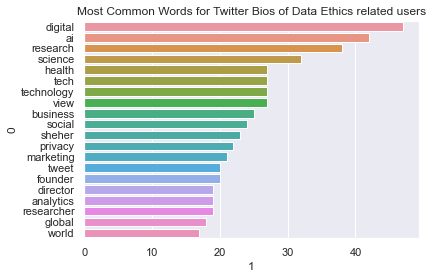

In [27]:
freq_data_desc = pd.DataFrame.from_dict(fdist_desc.most_common(20))
rel = sns.barplot(data = freq_data_desc, x = 1, y = 0).set(title='Most Common Words for Twitter Bios of Data Ethics related users')


In [28]:
most_common_desc = []

for key in fdist_desc.most_common(20):
    most_common_desc.append(key[0])
    
most_common_desc

['digital',
 'ai',
 'research',
 'science',
 'health',
 'tech',
 'technology',
 'view',
 'business',
 'social',
 'sheher',
 'privacy',
 'marketing',
 'tweet',
 'founder',
 'director',
 'analytics',
 'researcher',
 'global',
 'world']

## Clustering by description
### This helps us identify the different kinds of accounts that are tweeting about this topic.

In [29]:
%%time 
range_k = [i for i in range(1, 9)]
results_k = {}
for k in range_k:
    results_k[k] = evaluate_k_kmeans_inertia(k)

running Kmeans with k=1
running Kmeans with k=2
running Kmeans with k=3
running Kmeans with k=4
running Kmeans with k=5
running Kmeans with k=6
running Kmeans with k=7
running Kmeans with k=8
Wall time: 4.98 s


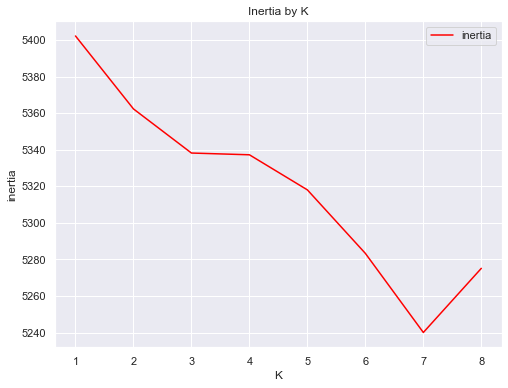

In [30]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.lineplot(
    [c[0] for c in results_k.items()],
    [c[1] for c in results_k.items()], label="inertia", color="red")
ax.set_xlabel("K")
ax.set_ylabel("inertia")
ax.set_title("Inertia by K")
ax.legend();


### Cluster Analysis

In [31]:
estimator_kmeans = KMeans(random_state=42, n_clusters=6)

estimator_kmeans.fit(desc_vec)

KMeans(n_clusters=6, random_state=42)

In [32]:
desc_vec["cluster_id"] = estimator_kmeans.labels_
desc_vec.head()

,00025b,00371nomorewarenddeathpenalty,0055,0207,0333,0345,04050,0620,10,100,...,yorker,young,youtube,youtuber,zebra,zero,zerocovid,zorro,équipes,cluster_id
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [34]:
desc_clusters = desc_vec.groupby('cluster_id').sum()
desc_clusters.head()

,00025b,00371nomorewarenddeathpenalty,0055,0207,0333,0345,04050,0620,10,100,...,yes,yorker,young,youtube,youtuber,zebra,zero,zerocovid,zorro,équipes
cluster_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
desc_clusters_20 = desc_clusters[['digital',
 'ai',
 'research',
 'science',
 'health',
 'tech',
 'technology',
 'view',
 'business',
 'social',
 'sheher',
 'privacy',
 'marketing',
 'tweet',
 'founder',
 'director',
 'analytics',
 'researcher',
 'global',
 'world']]

desc_clusters_20


,digital,ai,research,science,health,tech,technology,view,business,social,sheher,privacy,marketing,tweet,founder,director,analytics,researcher,global,world
cluster_id,,,,,,,,,,,,,,,,,,,,
0,43.0,36.0,6.0,2.0,2.0,9.0,25.0,5.0,7.0,4.0,5.0,7.0,8.0,7.0,4.0,6.0,6.0,4.0,7.0,5.0
1,0.0,0.0,29.0,26.0,20.0,16.0,1.0,21.0,18.0,18.0,18.0,13.0,9.0,12.0,15.0,12.0,13.0,14.0,8.0,12.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


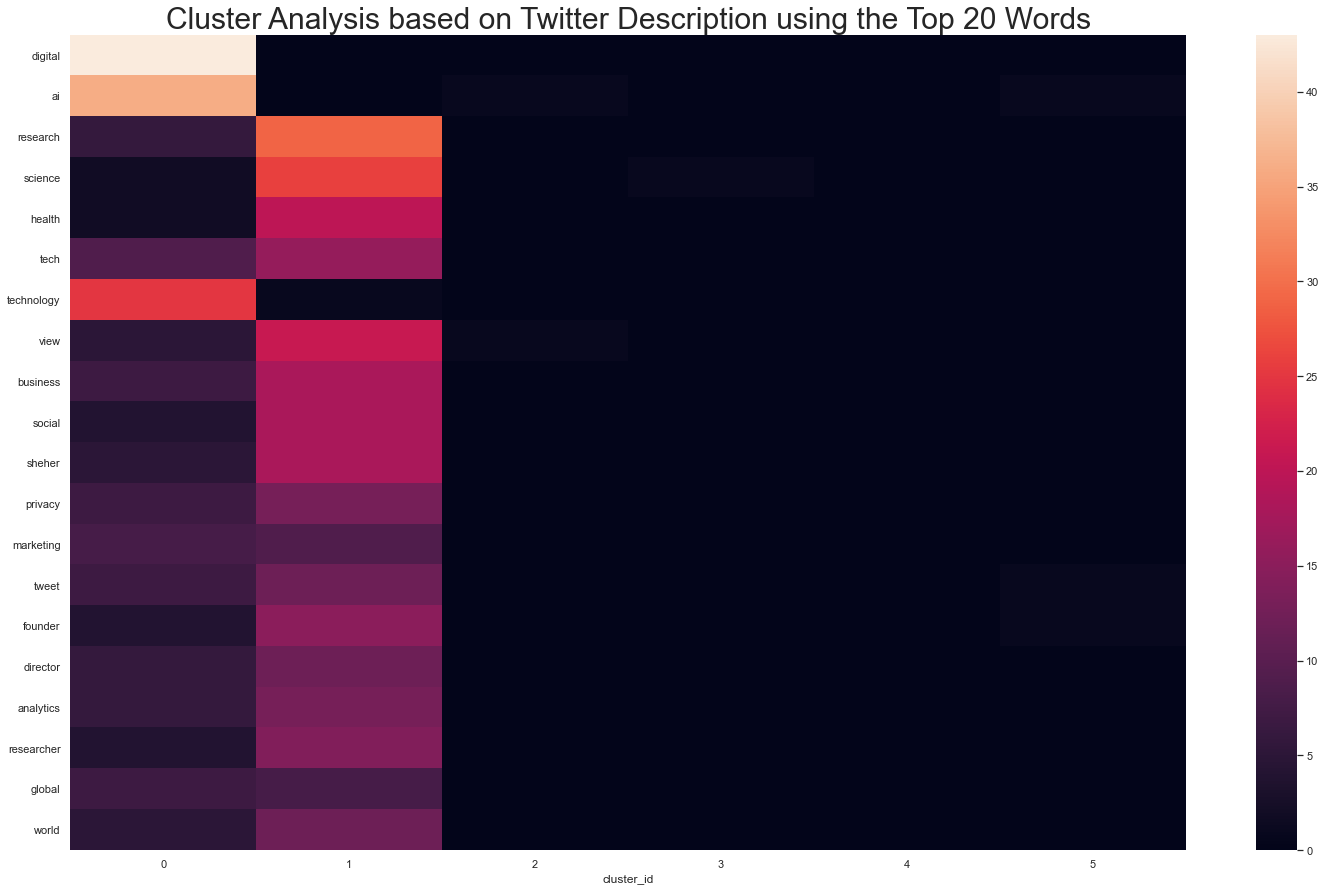

In [37]:
fig, ax = plt.subplots(figsize=(25,15))
sns.heatmap(desc_clusters_20.transpose(), annot=False)
plt.title("Cluster Analysis based on Twitter Description using the Top 20 Words", size = 30);
# Look for rows with a lot of variation to see defining features

## Clustering on other columns

In [39]:
df2 = data[["created_at", "is_quote", "retweet_count", "location", "followers_count", "friends_count", "listed_count", "account_created_at", "verified"]][:3000]
df2.head() # remove is_retweet and protected, no variance

,created_at,is_quote,retweet_count,location,followers_count,friends_count,listed_count,account_created_at,verified
0,2021-06-16 17:21:53,False,0,NaN,2272,1203,18,2018-11-21 10:30:22,False
1,2021-06-16 17:20:38,False,0,Bharatvarsh,348,153,10,2009-02-06 16:07:05,False
2,2021-06-16 17:17:29,False,0,"Santa Barbara, CA",15,105,0,2017-02-08 19:04:50,False
3,2021-06-16 16:20:28,False,0,Michigan State University,2052,1602,113,2009-05-27 19:16:36,False
4,2021-06-16 16:16:06,False,1,"Sarasota, FL",137,228,59,2012-10-07 18:20:01,False


In [40]:
#saving only the time
from datetime import datetime, date
df2[["created_at"]] = df2[["created_at"]].apply(pd.to_datetime)

In [41]:
df2['year_account_created'] = pd.DatetimeIndex(df2["account_created_at"]).year
df2 = df2.drop(["created_at", "account_created_at"], axis=1)
df2['year_account_created'] = df2["year_account_created"].astype("category")
df2.head()

,is_quote,retweet_count,location,followers_count,friends_count,listed_count,verified,year_account_created
0,False,0,NaN,2272,1203,18,False,2018
1,False,0,Bharatvarsh,348,153,10,False,2009
2,False,0,"Santa Barbara, CA",15,105,0,False,2017
3,False,0,Michigan State University,2052,1602,113,False,2009
4,False,1,"Sarasota, FL",137,228,59,False,2012


In [42]:
df2 = df2.drop('location', axis = 1)

In [43]:
numerical_data = df2.select_dtypes(np.number)
categorical_data = df2.drop(numerical_data, axis = 1)

### Processing Data

In [44]:
from sklearn.preprocessing import MinMaxScaler

numerical_data_normalized = MinMaxScaler().fit_transform(numerical_data) # this line scales our data

numerical_data_normalized = pd.DataFrame(              #this pops it back in data frame format 
    numerical_data_normalized,
    columns=numerical_data.columns) 

numerical_data_normalized.head()

,retweet_count,followers_count,friends_count,listed_count
0,0.00000,0.001948,0.011135,0.001003
1,0.00000,0.000298,0.001416,0.000557
2,0.00000,0.000013,0.000972,0.000000
3,0.00000,0.001760,0.014828,0.006296
4,0.00365,0.000117,0.002110,0.003287


In [45]:
categorical_data_codified = pd.get_dummies(
                                    categorical_data, 
                                    drop_first=True,
                                    dtype="int64"
).reset_index()
categorical_data_codified.head()

,index,is_quote,verified,year_account_created_2008,year_account_created_2009,year_account_created_2010,year_account_created_2011,year_account_created_2012,year_account_created_2013,year_account_created_2014,year_account_created_2015,year_account_created_2016,year_account_created_2017,year_account_created_2018,year_account_created_2019,year_account_created_2020,year_account_created_2021
0,0,False,False,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,1,False,False,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,2,False,False,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,3,False,False,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,4,False,False,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [46]:
categorical_data_codified = categorical_data_codified.drop('index', axis = 1)


In [47]:
df2_processed = pd.concat([
                            numerical_data_normalized,
                            categorical_data_codified
                        ], axis=1
).reset_index()

In [48]:
df2_processed = df2_processed.drop('index', axis = 1)


In [49]:
df2_processed.head()


,retweet_count,followers_count,friends_count,listed_count,is_quote,verified,year_account_created_2008,year_account_created_2009,year_account_created_2010,year_account_created_2011,year_account_created_2012,year_account_created_2013,year_account_created_2014,year_account_created_2015,year_account_created_2016,year_account_created_2017,year_account_created_2018,year_account_created_2019,year_account_created_2020,year_account_created_2021
0,0.00000,0.001948,0.011135,0.001003,False,False,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.00000,0.000298,0.001416,0.000557,False,False,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0.00000,0.000013,0.000972,0.000000,False,False,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0.00000,0.001760,0.014828,0.006296,False,False,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0.00365,0.000117,0.002110,0.003287,False,False,0,0,0,0,1,0,0,0,0,0,0,0,0,0


### Finding K

In [50]:
%%time 
range_k = [2, 3, 4, 5, 8, 10, 15, 20, 25, 30, 35]
results_k = {}
for k in range_k:
    results_k[k] = evaluate_k_kmeans_inertia(k)

running Kmeans with k=2
running Kmeans with k=3
running Kmeans with k=4
running Kmeans with k=5
running Kmeans with k=8
running Kmeans with k=10
running Kmeans with k=15
running Kmeans with k=20
running Kmeans with k=25
running Kmeans with k=30
running Kmeans with k=35
Wall time: 14.5 s


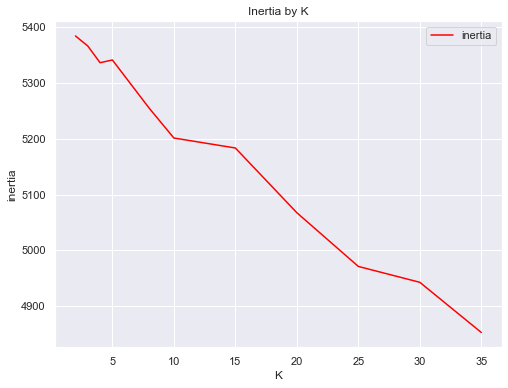

In [51]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.lineplot(
    [c[0] for c in results_k.items()],
    [c[1] for c in results_k.items()], label="inertia", color="red")
ax.set_xlabel("K")
ax.set_ylabel("inertia")
ax.set_title("Inertia by K")
ax.legend();

### Cluster Analysis

In [52]:
estimator_kmeans = KMeans(random_state=42, n_clusters=15) 
estimator_kmeans.fit(df2_processed)

KMeans(n_clusters=15, random_state=42)

In [53]:
df2["cluster_id"] = estimator_kmeans.labels_
df2.head()

,is_quote,retweet_count,followers_count,friends_count,listed_count,verified,year_account_created,cluster_id
0,False,0,2272,1203,18,False,2018,8
1,False,0,348,153,10,False,2009,3
2,False,0,15,105,0,False,2017,10
3,False,0,2052,1602,113,False,2009,3
4,False,1,137,228,59,False,2012,11


In [54]:
df2.cluster_id.value_counts()

2     116
3     109
4      68
6      61
5      55
9      53
1      51
11     48
7      47
10     46
8      44
12     41
0      33
14     32
13     14
Name: cluster_id, dtype: int64

In [55]:
cluster_summary(1, df2)

{'is_quote': 0.058823529411764705,
 'verified': 0.0,
 'year_account_created': 2021,
 'retweet_count': 4.862745098039215,
 'followers_count': 556.1960784313726,
 'friends_count': 638.0980392156863,
 'listed_count': 1.411764705882353,
 'cluster_id': 1.0}

In [59]:
cluster_comparison(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14)

cluster_id,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0
is_quote,0.060606,0.058824,0.051724,0.100917,0.117647,0.163636,0.131148,0.148936,0.113636,0.113208,0.195652,0.041667,0.121951,0.142857,0.09375
verified,0.000000,0.000000,0.000000,0.082569,0.132353,0.000000,0.000000,0.000000,0.000000,0.018868,0.021739,0.145833,0.024390,0.071429,0.15625
year_account_created,2014.000000,2021.000000,2020.000000,2009.000000,2010.000000,2019.000000,2016.000000,2013.000000,2018.000000,2011.000000,2017.000000,2012.000000,2015.000000,2007.000000,2008.00000
retweet_count,1.878788,4.862745,1.775862,1.972477,5.352941,1.872727,2.163934,1.489362,1.090909,1.245283,1.630435,2.312500,4.609756,0.785714,3.59375
followers_count,8397.636364,556.196078,1035.413793,9936.871560,25250.029412,1320.472727,8522.672131,5579.489362,1568.636364,3125.584906,1850.913043,8790.437500,3253.048780,8016.785714,40348.40625
friends_count,1167.363636,638.098039,632.939655,3611.899083,3131.647059,1102.018182,5979.114754,3040.170213,906.272727,1557.339623,1541.478261,2376.520833,1668.317073,2940.857143,5268.25000
listed_count,33.090909,1.411765,22.336207,421.972477,376.308824,6.345455,349.016393,364.765957,23.545455,141.113208,26.021739,441.562500,227.463415,440.500000,1051.34375


In [60]:
cluster_results = kmeans_cluster(df2_processed, 10)
cluster_summary2 = graph_summary_clustering(cluster_results)

In [61]:
#cluster_summary2 = cluster_summary2.drop('cluster_id', axis = 1)
cluster_summary2

,followers_count,friends_count,is_quote,listed_count,retweet_count,verified,year_account_created_2008,year_account_created_2009,year_account_created_2010,year_account_created_2011,year_account_created_2012,year_account_created_2013,year_account_created_2014,year_account_created_2015,year_account_created_2016,year_account_created_2017,year_account_created_2018,year_account_created_2019,year_account_created_2020,year_account_created_2021
Cluster,,,,,,,,,,,,,,,,,,,,
0,0.000888,0.005858,0.051724,0.001244,0.006481,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,1.0,0.0
1,0.008522,0.033431,0.100917,0.023511,0.007199,0.082569,0.000000,1.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.001587,0.014268,0.195652,0.001450,0.005950,0.021739,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.0,0.0,0.0
3,0.008719,0.021909,0.113744,0.018064,0.008562,0.033175,0.151659,0.0,0.0,0.0,0.0,0.222749,0.156398,0.194313,0.0,0.0,0.208531,0.0,0.0,0.0
4,0.007309,0.055342,0.131148,0.019446,0.007898,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.0,0.0,0.0
5,0.021654,0.028986,0.117647,0.020967,0.019536,0.132353,0.000000,0.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
6,0.000477,0.005906,0.058824,0.000079,0.017747,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,1.0
7,0.001132,0.010200,0.163636,0.000354,0.006835,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.0,0.0,0.0
8,0.007539,0.021997,0.041667,0.024602,0.008440,0.145833,0.000000,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0


<AxesSubplot:xlabel='Cluster'>

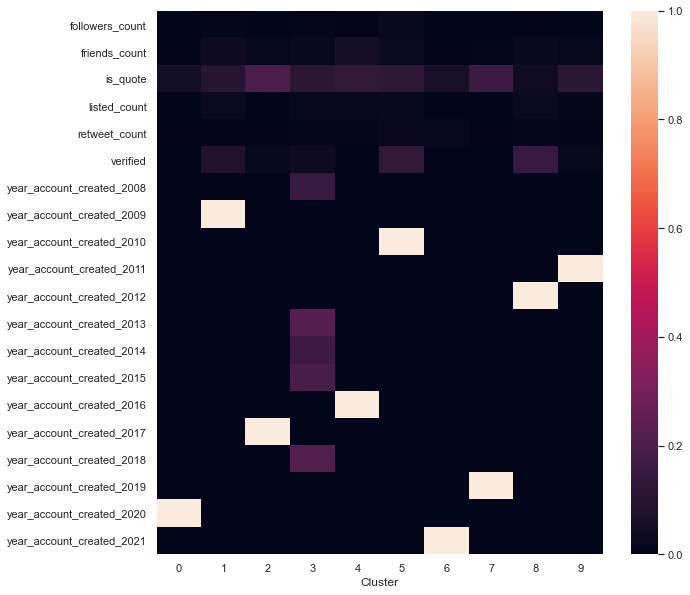

In [62]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cluster_summary2.transpose(), annot=False)
# the cluster looks better than the previous one on only the tweets